In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
import yfinance as yf

In [42]:
# Retrieving Roche stock data

train_data = yf.download('ROG.SW',start='2022-01-01', end='2024-01-01')
test_data = yf.download('ROG.SW',start='2024-01-02', end='2024-02-01')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [43]:
train_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,380.000000,383.000000,377.750000,378.899994,355.840210,854361
2022-01-04,380.500000,380.500000,369.399994,371.299988,348.702728,1163100
2022-01-05,370.549988,375.600006,370.100006,374.649994,351.848846,984909
2022-01-06,370.500000,374.149994,369.799988,371.649994,349.031433,867314
2022-01-07,370.000000,376.950012,369.600006,376.950012,354.008881,1038678


_____________
**Data Preprocessing**

In [44]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 505 entries, 2022-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       505 non-null    float64
 1   High       505 non-null    float64
 2   Low        505 non-null    float64
 3   Close      505 non-null    float64
 4   Adj Close  505 non-null    float64
 5   Volume     505 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.6 KB


In [45]:
# Selecting 'Open' as our training features
training_set = train_data.iloc[:, 1:2].values

In [46]:
training_set.shape, train_data.shape

((505, 1), (505, 6))

In [47]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [48]:
training_set_scaled

array([[0.87377189],
       [0.85888651],
       [0.8297112 ],
       [0.82107761],
       [0.83774934],
       [0.85382544],
       [0.84519203],
       [0.81720744],
       [0.76659715],
       [0.78624578],
       [0.79428392],
       [0.77463529],
       [0.77582601],
       [0.7737422 ],
       [0.76481097],
       [0.72878824],
       [0.66359038],
       [0.69157479],
       [0.71181887],
       [0.72432263],
       [0.7466507 ],
       [0.74456671],
       [0.74605525],
       [0.68323901],
       [0.68026193],
       [0.65644532],
       [0.66954453],
       [0.72223864],
       [0.72878824],
       [0.70199455],
       [0.65376588],
       [0.6713307 ],
       [0.67907103],
       [0.67549868],
       [0.67043762],
       [0.64185758],
       [0.64810955],
       [0.67311688],
       [0.63233108],
       [0.68175047],
       [0.69306333],
       [0.68800226],
       [0.68442991],
       [0.66299493],
       [0.6281631 ],
       [0.63143781],
       [0.6960404 ],
       [0.700

In [49]:
# Creating a data structure with 60 timesteps adn 1 output
X_train = []
y_train = []

for i in range(60, 505):
    
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

# Converting into numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

In [50]:
# Reshaping the DataSet
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

_____
**Building LSTM**

In [51]:
# Define an object (initializing RNN)
import keras as kr

model = kr.models.Sequential()

In [52]:
# first LSTM layer
model.add(kr.layers.LSTM(units=60, activation='relu', return_sequences=True, input_shape=(60,1)))
# dropout layer
model.add(kr.layers.Dropout(0.2))

# second LSTM layer
model.add(kr.layers.LSTM(units=60, activation='relu', return_sequences=True))
# dropout layer
model.add(kr.layers.Dropout(0.2))

# third LSTM layer
model.add(kr.layers.LSTM(units=80, activation='relu', return_sequences=True))
# dropout layer
model.add(kr.layers.Dropout(0.2))

# fourth LSTM layer
model.add(kr.layers.LSTM(units=120, activation='relu'))
# dropout layer
model.add(kr.layers.Dropout(0.2))

# Output layer
model.add(kr.layers.Dense(units=1))

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 60)            14880     
                                                                 
 dropout_4 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_5 (LSTM)               (None, 60, 60)            29040     
                                                                 
 dropout_5 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_6 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_6 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [54]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

_____
**Training the Model**

In [55]:
model.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
14/14 [==============================] - 6s 77ms/step - loss: 0.1018
Epoch 2/100
14/14 [==============================] - 1s 78ms/step - loss: 0.0263
Epoch 3/100
14/14 [==============================] - 1s 77ms/step - loss: 0.0178
Epoch 4/100
14/14 [==============================] - 1s 78ms/step - loss: 0.0096
Epoch 5/100
14/14 [==============================] - 1s 78ms/step - loss: 0.0081
Epoch 6/100
14/14 [==============================] - 1s 78ms/step - loss: 0.0081
Epoch 7/100
14/14 [==============================] - 1s 80ms/step - loss: 0.0076
Epoch 8/100
14/14 [==============================] - 1s 87ms/step - loss: 0.0078
Epoch 9/100
14/14 [==============================] - 1s 84ms/step - loss: 0.0070
Epoch 10/100
14/14 [==============================] - 1s 79ms/step - loss: 0.0081
Epoch 11/100
14/14 [==============================] - 1s 79ms/step - loss: 0.0072
Epoch 12/100
14/14 [==============================] - 1s 80ms/step - loss: 0.0053
Epoch 13/100
14/14 [=====

_______
**Making Predictions**

In [56]:
# Getting the real stock prices
real_stock_data = test_data.iloc[:, 1:2].values

In [58]:
# Getting predicted stock prices

# concatenation
dataset_total = pd.concat([train_data['Open'], test_data['Open']], axis=0)

# stock prices of previous 60 days for each day of January 2024
inputs = dataset_total[len(dataset_total) - len(test_data)-60:].values

# reshape (convert into np array)
inputs = inputs.reshape(-1,1)

# feature scaling
inputs = sc.transform(inputs)



In [ ]:
# Creating a test set

X_test = []

for i in range(60,80):
    X_test.append(inputs[i-60:i, 0])
    
# Convert to np array
X_test = np.array(X_test)

# Convert to 3D (required to process)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1 ))

# Getting predicted stock prices
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [67]:
print(predicted_stock_price[0]), print(real_stock_data[0])

[247.7975]
[253.44999695]


(None, None)

_____
**Visualisation**

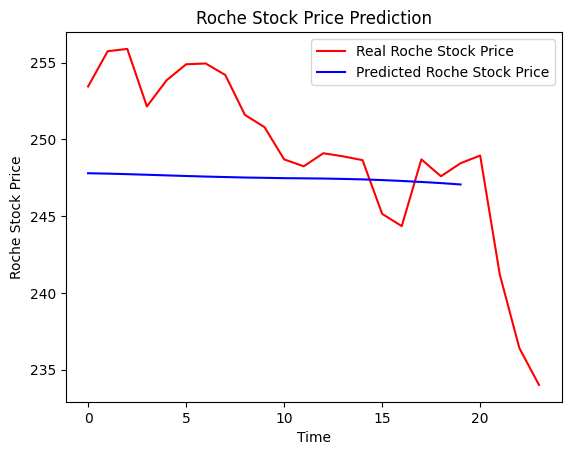

In [65]:
# Visualising the results
plt.plot(real_stock_data, color='red', label='Real Roche Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Roche Stock Price')
plt.title('Roche Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Roche Stock Price')
plt.legend()
plt.show()
